What is a dataframe?

A dataframe is a collection of values arranged as a table. It is a tabular organization of data in where the rows represent cases (or observations) and the columns are  the variables. Dataframes will be the mostly used raw data input you will  ever use in R.

Set working directory. Load in libraries

In [30]:
library(Biostatistics)
library(mosaic)
library(sciplot)
library(ggplot2)

Read in data set and run summary

In [9]:
data("weaver")
summary(weaver)

   Bird_ID           Treatment            GrpSize        SOD_final    
 Length:34          Length:34          Min.   :2.000   Min.   :121.9  
 Class :character   Class :character   1st Qu.:4.250   1st Qu.:158.2  
 Mode  :character   Mode  :character   Median :5.000   Median :189.9  
                                       Mean   :5.059   Mean   :225.1  
                                       3rd Qu.:6.000   3rd Qu.:245.3  
                                       Max.   :8.000   Max.   :445.3  
                                                       NA's   :2      
   MDA_final       mass_final   
 Min.   :2.100   Min.   :38.80  
 1st Qu.:2.725   1st Qu.:42.47  
 Median :3.160   Median :44.73  
 Mean   :3.192   Mean   :44.86  
 3rd Qu.:3.638   3rd Qu.:47.70  
 Max.   :5.570   Max.   :49.78  
 NA's   :2                      

Summary statistics

In [2]:
mass.mean=mean(weaver$mass_final)
mass.mean

[1] 44.86

In [10]:
mass.median=median(weaver$mass_final)
mass.median

[1] 44.73

In [3]:
mass.variance=var(weaver$mass_final)
mass.variance

[1] 9.650576

Get the standard deviation

In [5]:
mass.sd=sd(weaver$mass_final)
mass.sd

[1] 3.106538

Let's suppose we want to analyze only the eggs left treatment in the weaver dataframe. This is achieved  by using "subset."
Subset the data to just those with Treatment "Eggs_left"

In [11]:
weaver.eggs.left<-subset(weaver,weaver$Treatment=="Eggs_left")
summary(weaver.eggs.left)

   Bird_ID           Treatment            GrpSize        SOD_final    
 Length:24          Length:24          Min.   :2.000   Min.   :127.2  
 Class :character   Class :character   1st Qu.:5.000   1st Qu.:155.8  
 Mode  :character   Mode  :character   Median :5.000   Median :205.4  
                                       Mean   :5.208   Mean   :243.5  
                                       3rd Qu.:6.000   3rd Qu.:347.0  
                                       Max.   :7.000   Max.   :445.3  
                                                       NA's   :2      
   MDA_final       mass_final   
 Min.   :2.250   Min.   :38.80  
 1st Qu.:2.732   1st Qu.:41.54  
 Median :3.035   Median :44.16  
 Mean   :3.205   Mean   :44.58  
 3rd Qu.:3.580   3rd Qu.:47.87  
 Max.   :5.570   Max.   :49.78  
 NA's   :2                      

In [13]:
mass.eggs.left.mean=mean(weaver.eggs.left$mass_final)
mass.eggs.left.mean

[1] 44.57667

Test if mass.eggs.left.mean greater than mass.mean

In [15]:
mass.eggs.left.mean > mass.mean

[1] FALSE

Get the 25th percentile for the variable (Note pdata/qdata requires mosaic package)

In [16]:
mass.q25=qdata(weaver$mass_final,0.25)
mass.q25

p quantile 
  0.2500  42.4675

Get the proportion of the population less than 40

In [17]:
mass.less.than.40=pdata(weaver$mass_final,40)
mass.less.than.40

[1] 0.05882353

Get the proportion of the population greater than 39

In [19]:
mass.more.than.39=1-pdata(weaver$mass_final,39)
mass.more.than.39

[1] 0.9411765

Extract all large birds from the populations

In [20]:
weaver.large=subset(weaver, weaver$mass_final>45)
summary(weaver.large)

   Bird_ID           Treatment            GrpSize        SOD_final    
 Length:16          Length:16          Min.   :2.000   Min.   :121.9  
 Class :character   Class :character   1st Qu.:4.750   1st Qu.:170.1  
 Mode  :character   Mode  :character   Median :5.000   Median :186.8  
                                       Mean   :5.062   Mean   :226.3  
                                       3rd Qu.:6.000   3rd Qu.:246.8  
                                       Max.   :8.000   Max.   :428.4  
                                                       NA's   :1      
   MDA_final       mass_final   
 Min.   :2.100   Min.   :45.30  
 1st Qu.:2.485   1st Qu.:46.03  
 Median :2.920   Median :47.83  
 Mean   :2.951   Mean   :47.64  
 3rd Qu.:3.435   3rd Qu.:48.87  
 Max.   :4.000   Max.   :49.78  
 NA's   :1                      

If we want to randomly resample the dataset use sample either without (Rand1) or with replacement (Rand2)

In [27]:
weaverRand1 = sample(weaver, 10)
weaverRand1 

,Bird_ID,Treatment,GrpSize,SOD_final,MDA_final,mass_final,orig.id
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
23,expt177,Eggs_left,5,428.35,2.95,49.35,23
33,expt187,Eggs_left,6,132.91,2.92,48.94,33
31,expt185,Eggs_left,6,127.20,2.59,41.57,31
17,expt171,Eggs_left,4,NA,3.63,38.80,17
26,expt180,Eggs_left,7,149.52,2.25,43.43,26
12,expt166,Eggs_removed,3,174.16,2.56,47.89,12
5,expt159,Eggs_left,6,378.99,2.92,48.28,5
3,expt157,Eggs_removed,5,135.16,3.66,43.43,3
19,expt173,Eggs_left,2,238.97,3.62,43.12,19


In [28]:
weaverRand2 = sample(weaver, 10, replace=TRUE)
weaverRand2 

,Bird_ID,Treatment,GrpSize,SOD_final,MDA_final,mass_final,orig.id
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
15,expt169,Eggs_removed,5,180.87,2.80,46.03,15
26,expt180,Eggs_left,7,149.52,2.25,43.43,26
3,expt157,Eggs_removed,5,135.16,3.66,43.43,3
15.1,expt169,Eggs_removed,5,180.87,2.80,46.03,15
30,expt184,Eggs_left,6,152.32,2.71,49.53,30
30.1,expt184,Eggs_left,6,152.32,2.71,49.53,30
28,expt182,Eggs_left,3,143.57,3.20,44.90,28
19,expt173,Eggs_left,2,238.97,3.62,43.12,19
8,expt162,Eggs_left,5,357.02,NA,41.42,8


What is the distribution of "mass" in the weaver study?

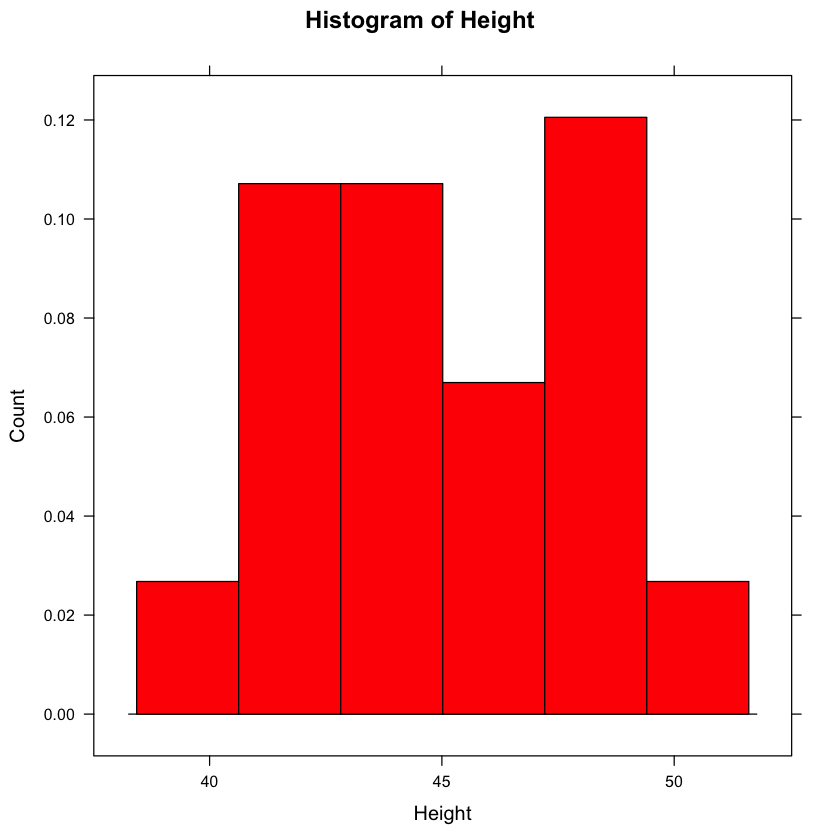

In [29]:
histogram( weaver$mass_final, xlab="Height",  ylab="Count",
main="Histogram of Height", col="red")

Color by treatment

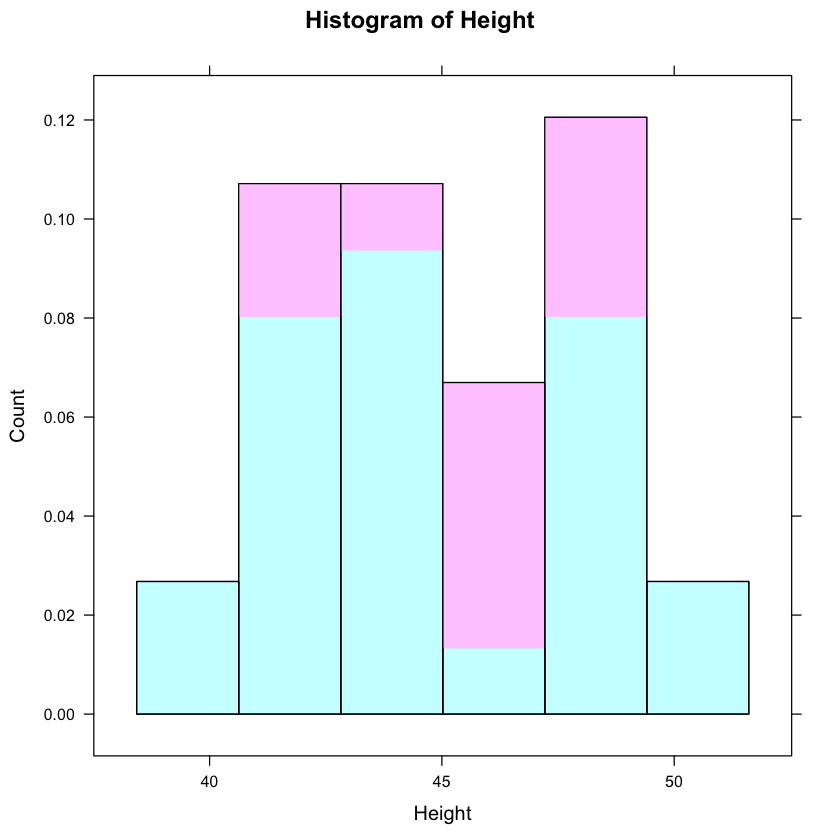

In [40]:
histogram(weaver$mass_final, groups=weaver$Treatment, stripes='horizontal', xlab="Height",  ylab="Count",
main="Histogram of Height")

Using ggplot2 for nicer plotting

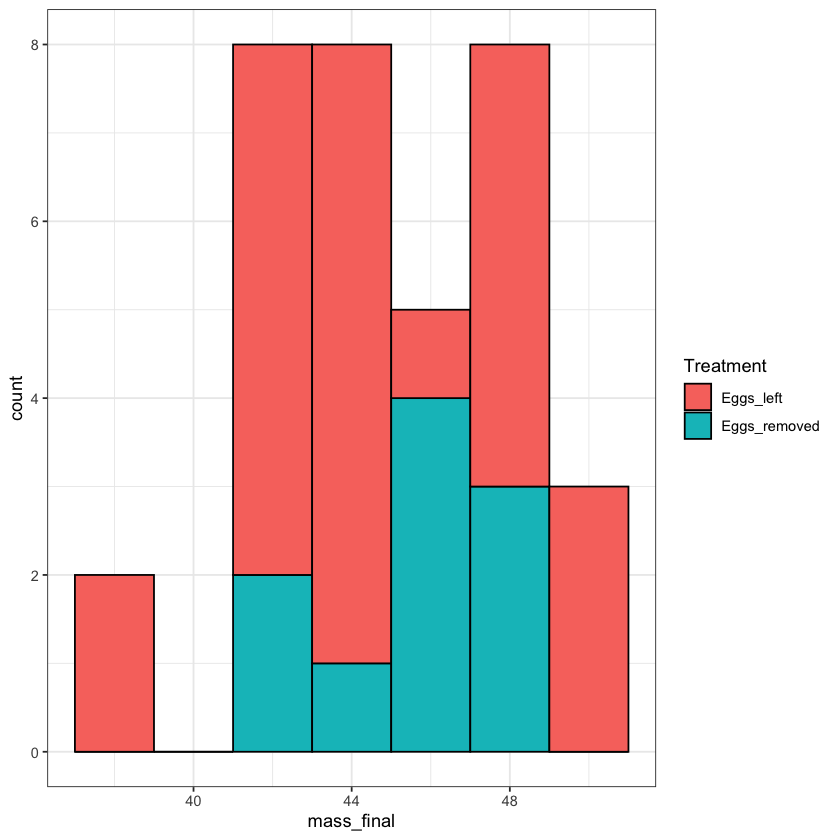

In [38]:
ggplot(weaver,aes(x=mass_final, fill=Treatment))+  geom_histogram(binwidth = 2,  color="black", stat="bin")+theme_bw()

R orders things alphabetically, let's reorder the colors

In [43]:
weaver$Treatment<-factor(weaver$Treatment, levels=c("Eggs_removed", "Eggs_left"))

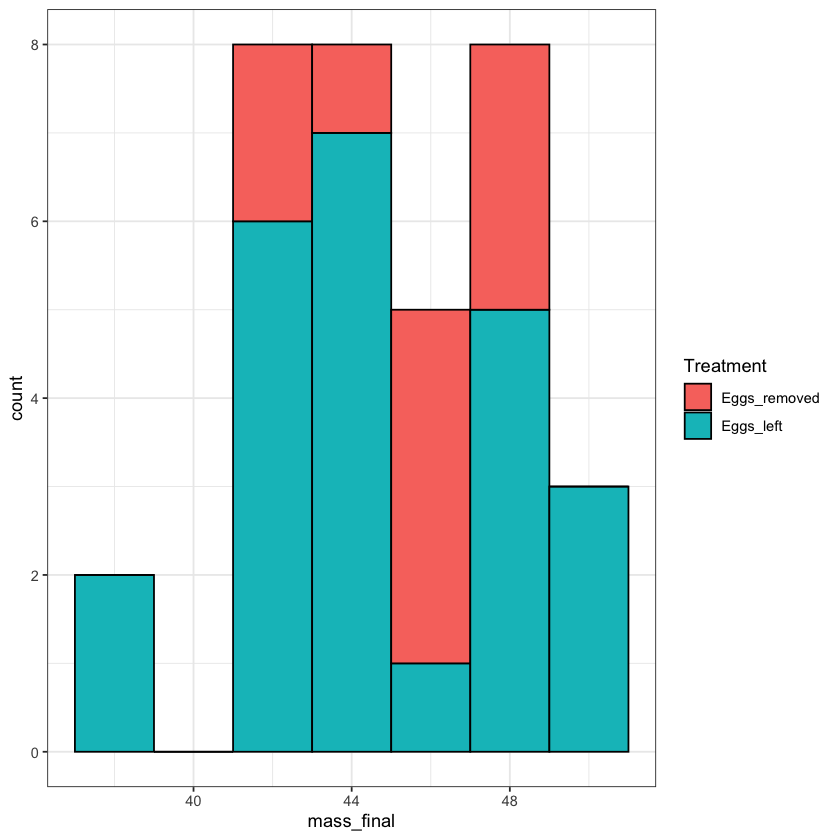

In [44]:
ggplot(weaver,aes(x=mass_final, fill=Treatment))+  geom_histogram(binwidth = 2,  color="black", stat="bin")+theme_bw()

Create a non stacked plot using positon= "dodge"

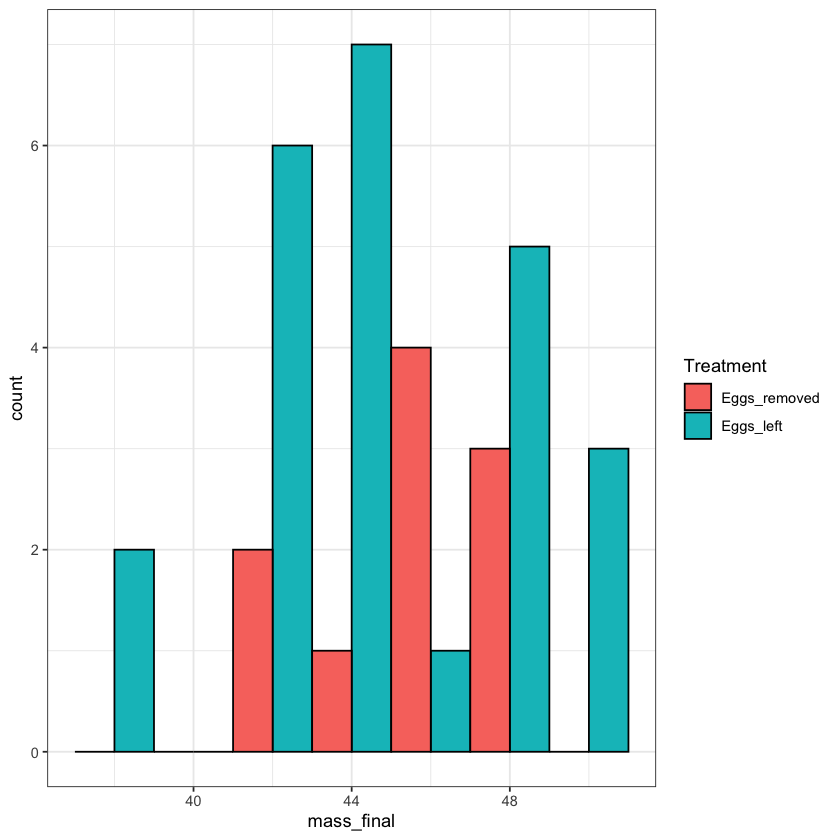

In [45]:
ggplot(weaver,aes(x=mass_final, fill=Treatment))+  geom_histogram(binwidth = 2,  color="black", stat="bin",position="dodge")+theme_bw()

Let's assume we want to see if there is some diﬀerence in males between Eggs_removed and Eggs_left
We can draw a box (or whisker) plot. Note that this is either Y~X or GroupA,GroupB

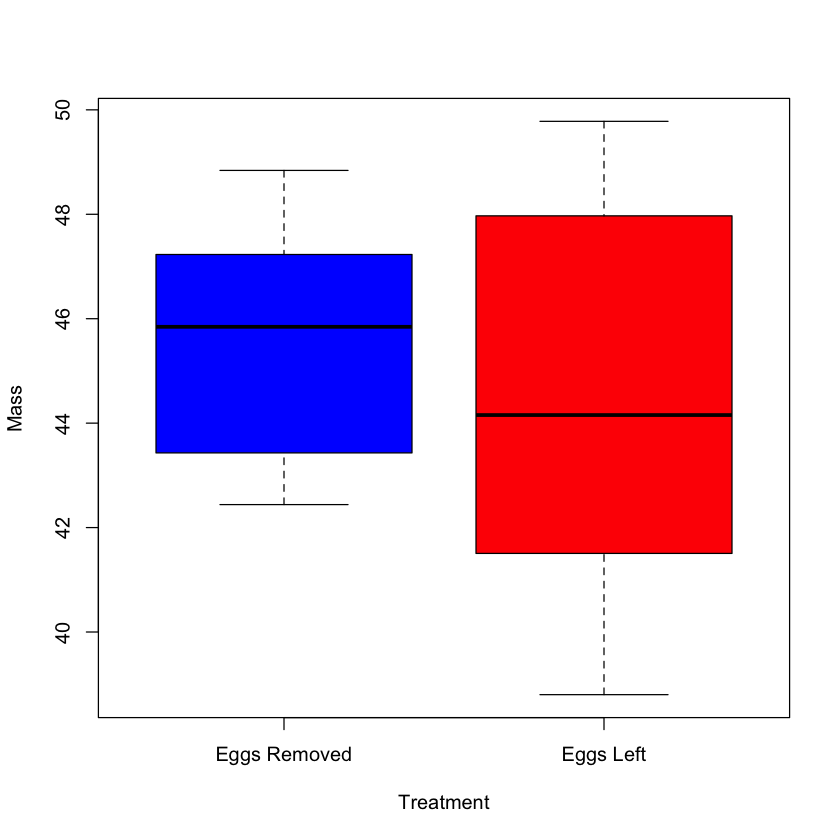

In [50]:
boxplot(mass_final ~ Treatment,data=weaver,  xlab="Treatment",ylab="Mass",col=c("blue","red"), names=c("Eggs Removed","Eggs Left"))

box edges represent the third and ﬁrst quartiles (50% of  the data)
▶ black line is the median
▶ lower 50% of the data is below the median
▶ lower 25% of the data occurs between the bottom edge of  the box and the bottom edge of the lower whisker
▶ upper 25% of the data occurs above the top edge of the  box and the top edge of the upper whisker

Frequency distribution and barplot
Determine the frequency distribution for group size in the galton data and make a bargraph.
First we need to get the frequency distribution (use the  command table to make it).

In [48]:
freq.of.group=table(weaver$GrpSize)
freq.of.group


 2  3  4  5  6  7  8 
 3  4  2 12  7  4  2 

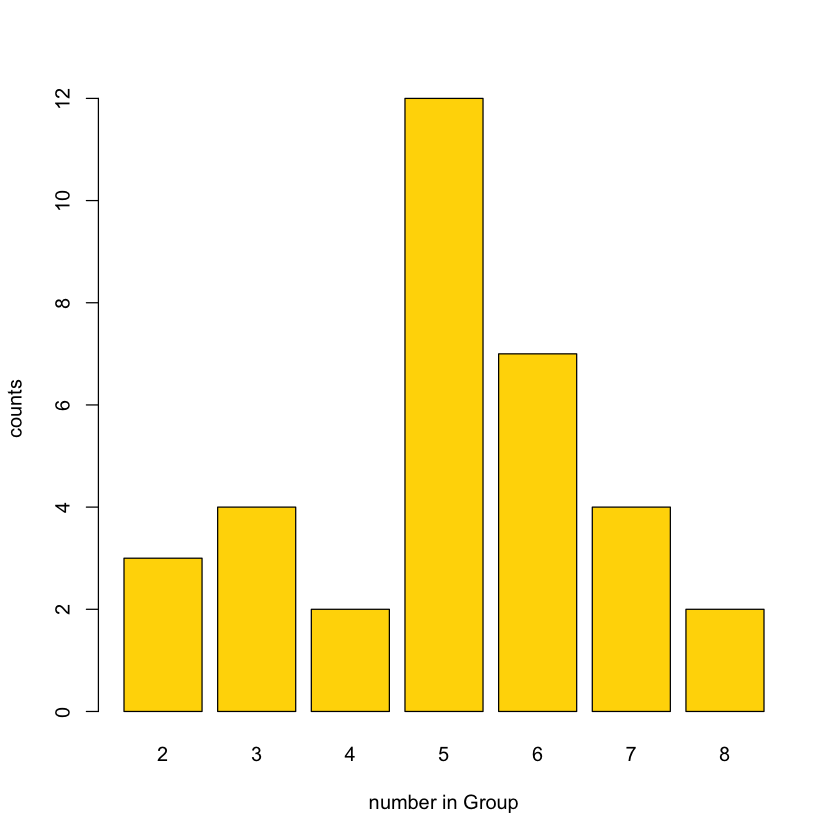

In [49]:
barplot(freq.of.group,xlab="number in Group",  ylab="counts",col="gold")

barplot can be categorial factors as well. Let's create a new categorial variable "large_group", which tells us if the group size greater than 5. It is a true/false variable than is added to the end of our data frame.

In [56]:
weaver$large_group<-weaver$GrpSize>5
summary(weaver)

   Bird_ID                 Treatment     GrpSize        SOD_final    
 Length:34          Eggs_removed:10   Min.   :2.000   Min.   :121.9  
 Class :character   Eggs_left   :24   1st Qu.:4.250   1st Qu.:158.2  
 Mode  :character                     Median :5.000   Median :189.9  
                                      Mean   :5.059   Mean   :225.1  
                                      3rd Qu.:6.000   3rd Qu.:245.3  
                                      Max.   :8.000   Max.   :445.3  
                                                      NA's   :2      
   MDA_final       mass_final    large_group    
 Min.   :2.100   Min.   :38.80   Mode :logical  
 1st Qu.:2.725   1st Qu.:42.47   FALSE:21       
 Median :3.160   Median :44.73   TRUE :13       
 Mean   :3.192   Mean   :44.86                  
 3rd Qu.:3.638   3rd Qu.:47.70                  
 Max.   :5.570   Max.   :49.78                  
 NA's   :2                                      


FALSE  TRUE 
   21    13 

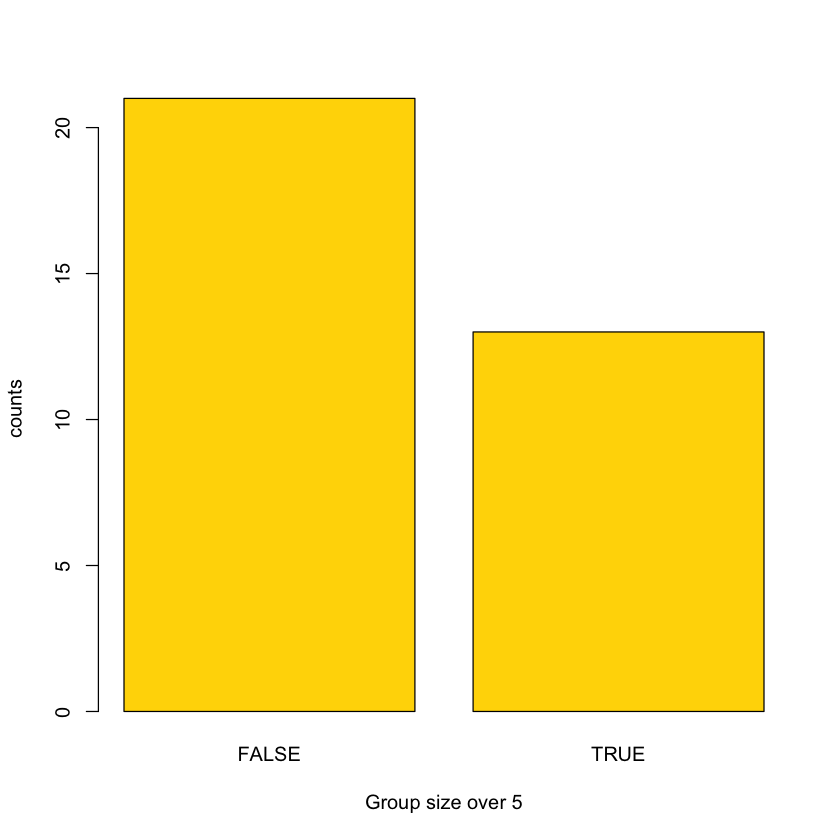

In [59]:
freq.of.large=table(weaver$large_group)
freq.of.large
barplot(freq.of.large,xlab="Group size over 5",  ylab="counts",col="gold")

Let's subset by group size and look at the mass

In [ ]:
Large<-subset(weaver,weaver$large_group=="TRUE")
summary(Large)

In [79]:
Small<-subset(weaver,weaver$large_group=="FALSE")
summary(Small)

   Bird_ID                 Treatment     GrpSize        SOD_final    
 Length:21          Eggs_removed: 8   Min.   :2.000   Min.   :121.9  
 Class :character   Eggs_left   :13   1st Qu.:3.000   1st Qu.:170.6  
 Mode  :character                     Median :5.000   Median :203.2  
                                      Mean   :4.095   Mean   :238.7  
                                      3rd Qu.:5.000   3rd Qu.:300.1  
                                      Max.   :5.000   Max.   :445.3  
                                                      NA's   :2      
   MDA_final       mass_final    large_group    
 Min.   :2.100   Min.   :38.80   Mode :logical  
 1st Qu.:2.890   1st Qu.:43.12   FALSE:21       
 Median :3.350   Median :44.90                  
 Mean   :3.241   Mean   :44.87                  
 3rd Qu.:3.625   3rd Qu.:47.23                  
 Max.   :4.080   Max.   :49.35                  
 NA's   :2                                      

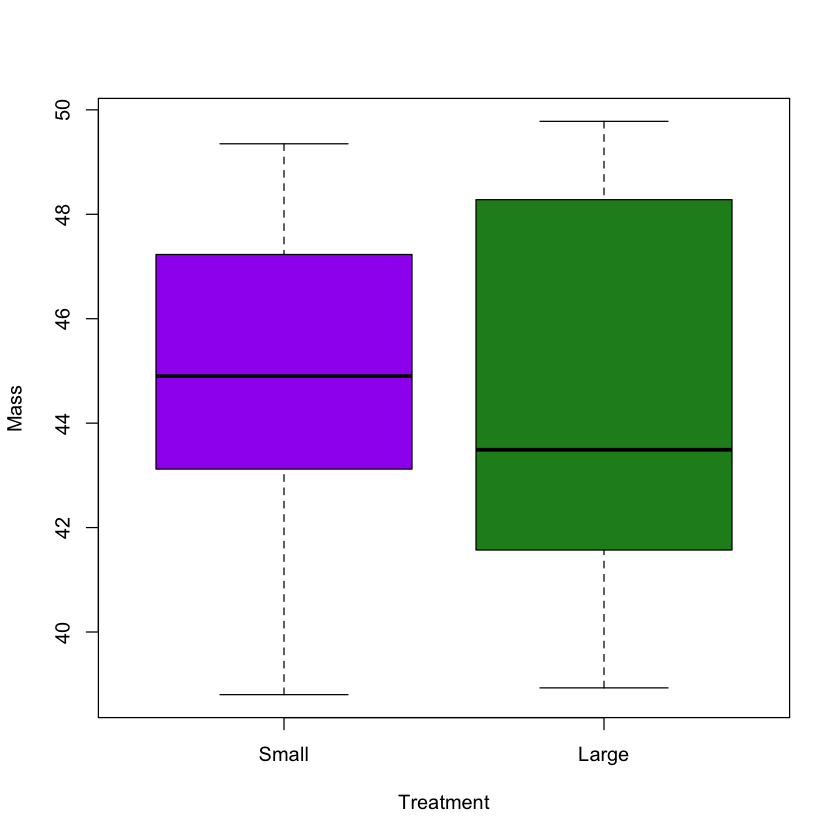

In [82]:
boxplot(Small$mass_final,Large$mass_final, xlab="Treatment",ylab="Mass",col=c("purple","forestgreen"), names=c("Small","Large"))

Table and barplot can be done for two categorical variables

In [61]:
freq.of.large.treat=table(weaver$large_group, weaver$Treatment)
freq.of.large.treat

       
        Eggs_removed Eggs_left
  FALSE            8        13
  TRUE             2        11

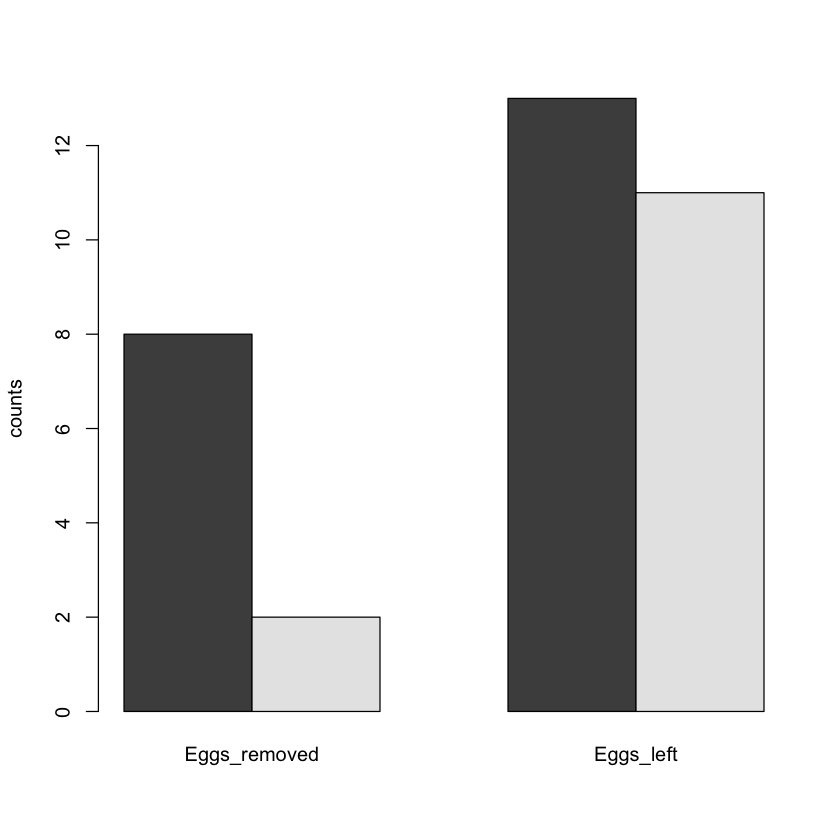

In [63]:
barplot(freq.of.large.treat,ylab="counts",beside=TRUE)

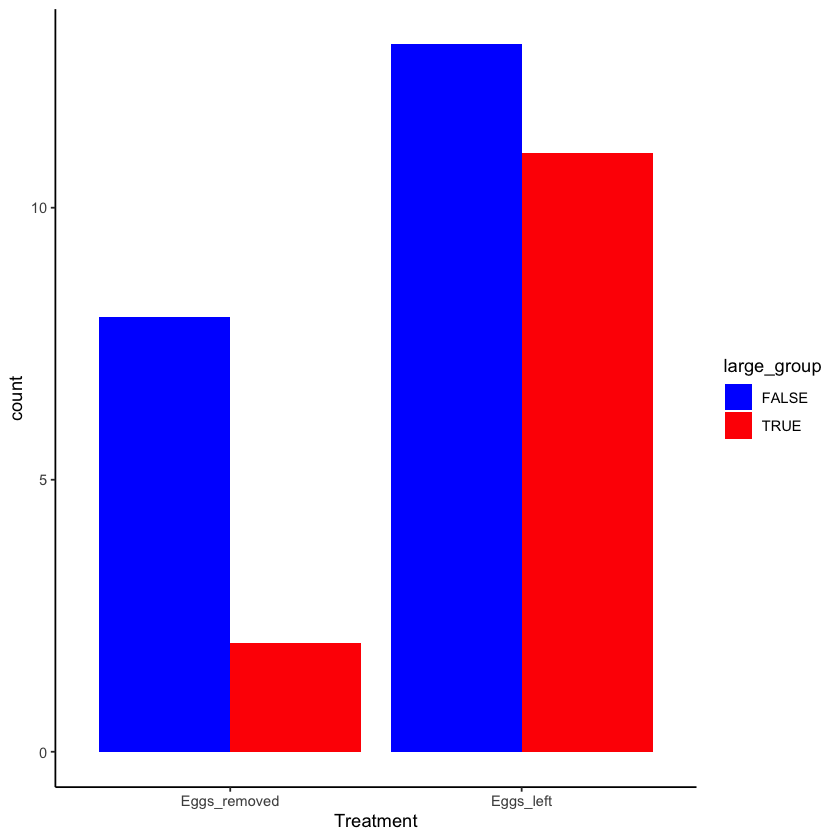

In [83]:
ggplot(weaver, aes(x=Treatment, fill=large_group)) +
     geom_bar(position="dodge") +
     xlab("Treatment") +
     ylab("count") +
     scale_fill_manual(values=c("blue","red")) +
     theme_classic()